In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('MAV_Financial Planning Revenue.csv')

In [69]:
df.head()

,Unnamed: 0,Version,Plan,Plan.1,Plan.2,Plan.3,Plan.4,Plan.5,Plan.6,Plan.7,Plan.8,Plan.9,Plan.10,Plan.11
0,NaN,Financial Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Profit Center,G/L Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mav PC 1,Net Sales,128525684.51,124935446.91,119661145.11,125468337.24,128399000.82,116044824.91,114688554.94,121342306.01,123709431.22,171352456,185337820.8,197630628.8
3,Mav PC 1,Gross Sales,129321395.77,125781776,120413082.4,126273411.9,129146350.9,116883479.3,115511893.2,122180912.4,124515381.8,480500680,475256636.8,499928052.8
4,Mav PC 1,Domestic Sales,44657466.37,45181930.2,38630119.5,43514712.4,44319610,37772625.5,35942743.9,40757701,37493048.7,158347763.2,160432254.4,158685014.4


In [70]:
df=df.drop([0,1])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 2 to 73
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72 non-null     object
 1   Version     72 non-null     object
 2   Plan        72 non-null     object
 3   Plan.1      72 non-null     object
 4   Plan.2      72 non-null     object
 5   Plan.3      72 non-null     object
 6   Plan.4      72 non-null     object
 7   Plan.5      72 non-null     object
 8   Plan.6      72 non-null     object
 9   Plan.7      72 non-null     object
 10  Plan.8      72 non-null     object
 11  Plan.9      72 non-null     object
 12  Plan.10     72 non-null     object
 13  Plan.11     72 non-null     object
dtypes: object(14)
memory usage: 8.0+ KB


In [72]:
df.columns=['Profit Centre','Category','jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec']
month_cols = ['jan', 'feb', 'march', 'april', 'may', 'june',
              'july', 'aug', 'sep', 'oct', 'nov', 'dec']
df[month_cols] = df[month_cols].apply(pd.to_numeric, errors='coerce')

In [73]:
df.head()

,Profit Centre,Category,jan,feb,march,april,may,june,july,aug,sep,oct,nov,dec
2,Mav PC 1,Net Sales,1.285257e+08,1.249354e+08,1.196611e+08,1.254683e+08,1.283990e+08,1.160448e+08,1.146886e+08,1.213423e+08,1.237094e+08,171352456.0,185337820.8,197630628.8
3,Mav PC 1,Gross Sales,1.293214e+08,1.257818e+08,1.204131e+08,1.262734e+08,1.291464e+08,1.168835e+08,1.155119e+08,1.221809e+08,1.245154e+08,480500680.0,475256636.8,499928052.8
4,Mav PC 1,Domestic Sales,4.465747e+07,4.518193e+07,3.863012e+07,4.351471e+07,4.431961e+07,3.777263e+07,3.594274e+07,4.075770e+07,3.749305e+07,158347763.2,160432254.4,158685014.4
5,Mav PC 1,Export Sales,3.828613e+07,3.899002e+07,3.858462e+07,4.048856e+07,4.448700e+07,3.807628e+07,3.832380e+07,4.271991e+07,4.342316e+07,166670046.4,160658766.4,164378403.2
6,Mav PC 1,Inter Co Sales,4.637780e+07,4.160983e+07,4.319835e+07,4.227013e+07,4.033974e+07,4.103457e+07,4.124535e+07,3.870330e+07,4.359917e+07,155482870.4,154165616.0,176864635.2


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 2 to 73
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Profit Centre  72 non-null     object 
 1   Category       72 non-null     object 
 2   jan            72 non-null     float64
 3   feb            72 non-null     float64
 4   march          72 non-null     float64
 5   april          72 non-null     float64
 6   may            72 non-null     float64
 7   june           72 non-null     float64
 8   july           72 non-null     float64
 9   aug            72 non-null     float64
 10  sep            72 non-null     float64
 11  oct            72 non-null     float64
 12  nov            72 non-null     float64
 13  dec            72 non-null     float64
dtypes: float64(12), object(2)
memory usage: 8.0+ KB


In [75]:
#create time series

# monthly revenue
monthly_totals=df[month_cols].sum(axis=0)

# create an index date
date_index=pd.date_range('2023-01',periods=12,freq='MS')
ts=pd.Series(monthly_totals.values,index=date_index,name="Revenue")

In [76]:
ts.head()

,Revenue
2023-01-01,9.134528e+08
2023-02-01,9.033664e+08
2023-03-01,9.322874e+08
2023-04-01,9.181017e+08
2023-05-01,9.540014e+08


In [77]:
monthly_totals.head(12)

,0
jan,9.134528e+08
feb,9.033664e+08
march,9.322874e+08
april,9.181017e+08
may,9.540014e+08
june,8.912603e+08
july,9.106011e+08
aug,8.998059e+08
sep,9.256601e+08
oct,3.653334e+09


In [78]:
date_index=pd.date_range('2023-01',periods=12,freq='MS')

In [79]:
date_index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')

<Axes: >

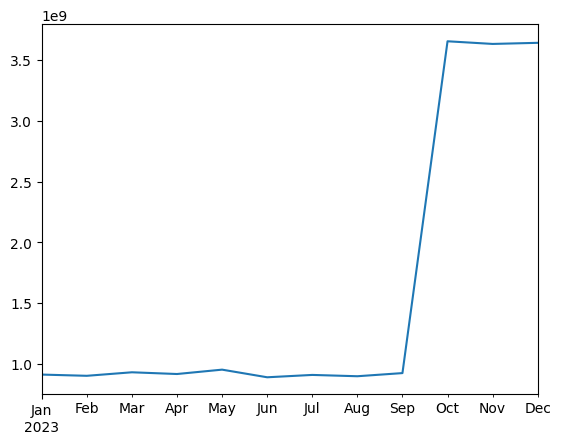

In [80]:
ts.plot()

In [81]:
# check for stationary
from statsmodels.tsa.stattools import adfuller

In [82]:
def adf_test(series):
    result=adfuller(series)
    print('ADF-statistics:{}',format(result[0]))
    print('p-value:{}',format(result[1]))
    if result[1]<=0.05:
        print("result is stationary")
    else:
        print("result is non-stationary")


In [83]:
adf_test(ts)

ADF-statistics:{} -0.4335825273364155
p-value:{} 0.9043389033808915
result is non-stationary


In [84]:
# differencing
ts_df=pd.DataFrame(ts)
ts_df['1st diff']=ts_df['Revenue'].diff(1)
ts_df.dropna(inplace=True)
adf_test(ts_df['1st diff'])

ADF-statistics:{} -4.107987187677467
p-value:{} 0.0009394972836490534
result is stationary


In [85]:
# ts_df['2nd diff']=ts_df['Revenue'].diff(2)
# ts_df.dropna(inplace=True)
# adf_test(ts_df['2nd diff'])

In [86]:
ts_df

,Revenue,1st diff
2023-02-01,9.033664e+08,-1.008647e+07
2023-03-01,9.322874e+08,2.892107e+07
2023-04-01,9.181017e+08,-1.418574e+07
2023-05-01,9.540014e+08,3.589973e+07
2023-06-01,8.912603e+08,-6.274109e+07
2023-07-01,9.106011e+08,1.934074e+07
2023-08-01,8.998059e+08,-1.079514e+07
2023-09-01,9.256601e+08,2.585421e+07
2023-10-01,3.653334e+09,2.727674e+09
2023-11-01,3.631544e+09,-2.179036e+07


In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

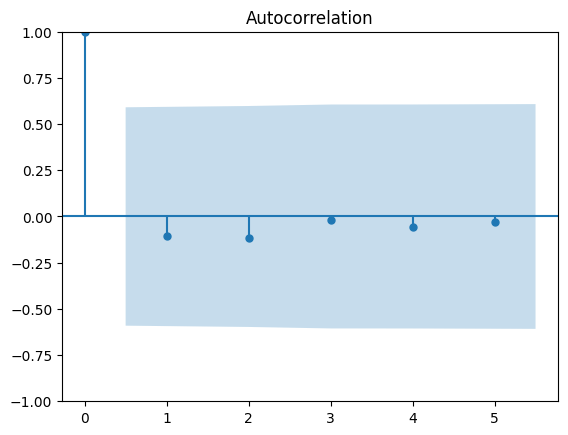

In [88]:
acf=plot_acf(ts_df['1st diff'])
# used to implement moving average
# used to find q value

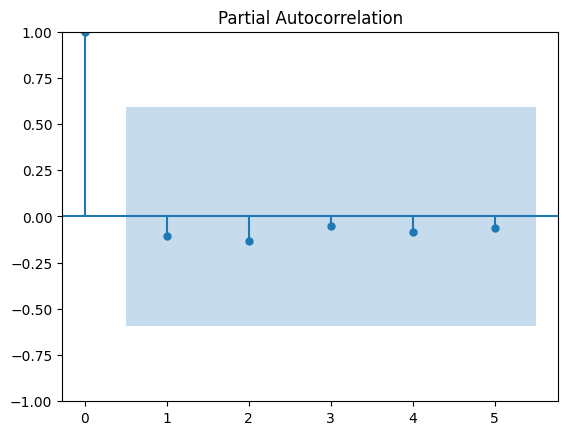

In [89]:
result=plot_pacf(ts_df['1st diff'])
# pacf is used to implement auto-regression
# used to find p value

In [90]:
train_size = int(len(ts_df) * 0.8)
train= ts_df.iloc[:train_size]
test=ts_df.iloc[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 8
Test size: 3


In [91]:
train

,Revenue,1st diff
2023-02-01,9.033664e+08,-10086467.12
2023-03-01,9.322874e+08,28921069.25
2023-04-01,9.181017e+08,-14185735.01
2023-05-01,9.540014e+08,35899727.33
2023-06-01,8.912603e+08,-62741090.79
2023-07-01,9.106011e+08,19340744.54
2023-08-01,8.998059e+08,-10795143.71
2023-09-01,9.256601e+08,25854210.30


In [92]:
test

,Revenue,1st diff
2023-10-01,3.653334e+09,2.727674e+09
2023-11-01,3.631544e+09,-2.179036e+07
2023-12-01,3.640607e+09,9.062708e+06


In [93]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Revenue'], order=(0,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

In [94]:
start_test=test.index[0]
end_test=test.index[-1]
pred=model_fit.predict(start=start_test,end=end_test)
residual=test['Revenue']-pred

In [95]:
residual

,0
2023-10-01,2.727674e+09
2023-11-01,2.705884e+09
2023-12-01,2.714946e+09


In [96]:
pred

,predicted_mean
2023-10-01,9.256601e+08
2023-11-01,9.256601e+08
2023-12-01,9.256601e+08


In [97]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                    8
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -131.056
Date:                Sun, 31 Aug 2025   AIC                            264.112
Time:                        15:47:57   BIC                            264.057
Sample:                    02-01-2023   HQIC                           263.443
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.277e+14   5.25e+14      1.767      0.077   -1.01e+14    1.96e+15
===================================================================================
Ljung-Box (L1) (Q):                   4.44   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.04   Prob(JB):                         0.58
Heteroskedasticity (H):               0.76   Skew:                            -0.95
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: ylabel='Density'>

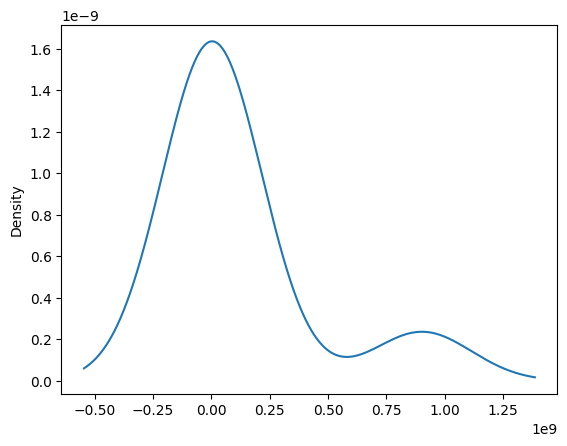

In [98]:
model_fit.resid.plot(kind='kde')

In [99]:
test["predicted arima"]=pred

/tmp/ipython-input-906901114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted arima"]=pred


<Axes: >

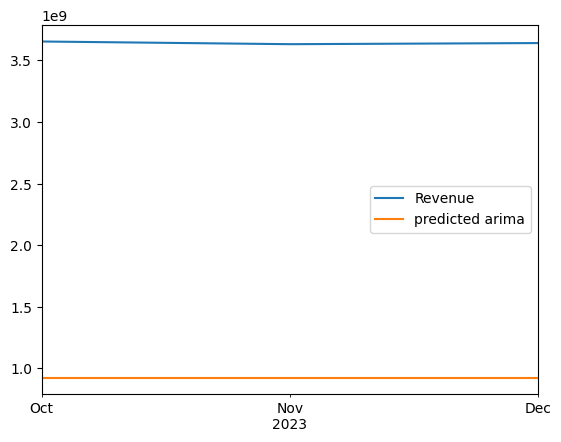

In [100]:
test[['Revenue','predicted arima']].plot()

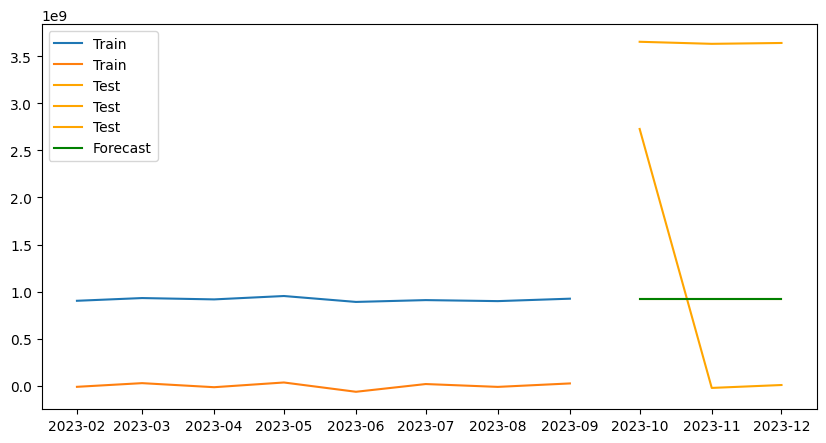

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="orange")
plt.plot(forecast, label="Forecast", color="green")
plt.legend()
plt.show()